In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, radians, pi

In [2]:
def file_read(f):
    """
    Reading LIDAR laser beams (angles and corresponding distance data)
    """
    measures = [line.split(",") for line in open(f)]
    angles = []
    distances = []
    for measure in measures:
        angles.append(float(measure[0]))
        distances.append(float(measure[1]))
    angles = np.array(angles)
    distances = np.array(distances)
    return angles, distances

In [3]:
import csv

# Open the input and output CSV files
with open('C:\\Users\\Sriram\\Downloads\\1m4m.csv', 'r') as input_file, open('output0.csv', 'w', newline='') as output_file:
    # Create CSV reader and writer objects
    csv_reader = csv.reader(input_file)
    csv_writer = csv.writer(output_file)

    # Iterate through each row in the input CSV file
    for row in csv_reader:
        # Initialize a new row to store shifted data
        new_row = []

        # Iterate through each cell in the current row
        for i, cell in enumerate(row):
            # Skip the third column
            if i == 2:
                continue

            # Split the cell data based on spaces
            cell_data = cell.split()

            # Add the first element to the current row
            new_row.append(cell_data[0])

            # If there are additional elements, shift them to the next column
            if len(cell_data) > 1:
                new_row.extend(cell_data[1:])

        # Write the modified row to the output CSV file
        csv_writer.writerow(new_row)


In [4]:
import csv
import tempfile
import shutil

# Open the input and temporary CSV files
with open('output0.csv', 'r') as input_file, tempfile.NamedTemporaryFile(mode='w', delete=False) as temp_file:
    # Create CSV reader and writer objects
    csv_reader = csv.reader(input_file)
    csv_writer = csv.writer(temp_file)

    # Iterate through each row in the input CSV file
    for row in csv_reader:
        # Exclude the third column
        new_row = [cell for i, cell in enumerate(row) if i != 0]

        # Write the modified row to the temporary CSV file
        csv_writer.writerow(new_row)

# Replace the original file with the temporary file
shutil.move(temp_file.name, 'output0.csv')


'output0.csv'

In [5]:
import csv

file_path = 'output0.csv'

# Read data from the CSV file
with open(file_path, 'r') as file:
    rows = list(csv.reader(file))

# Write only even-indexed rows back to the CSV file
with open(file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows[::2])


In [6]:
# import csv
# import tempfile
# import shutil

# # Open the input and temporary CSV files
# with open('output.csv', 'r') as input_file, tempfile.NamedTemporaryFile(mode='w', delete=False) as temp_file:
#     # Create CSV reader and writer objects
#     csv_reader = csv.reader(input_file)
#     csv_writer = csv.writer(temp_file)

#     # Skip the first row
#     next(csv_reader)

#     # Iterate through each row in the input CSV file
#     for row in csv_reader:
#         # Exclude the third column
#         new_row = [cell for i, cell in enumerate(row) if i != 2]

#         # Write the modified row to the temporary CSV file
#         csv_writer.writerow(new_row)

# # Replace the original file with the temporary file
# shutil.move(temp_file.name, 'output.csv')


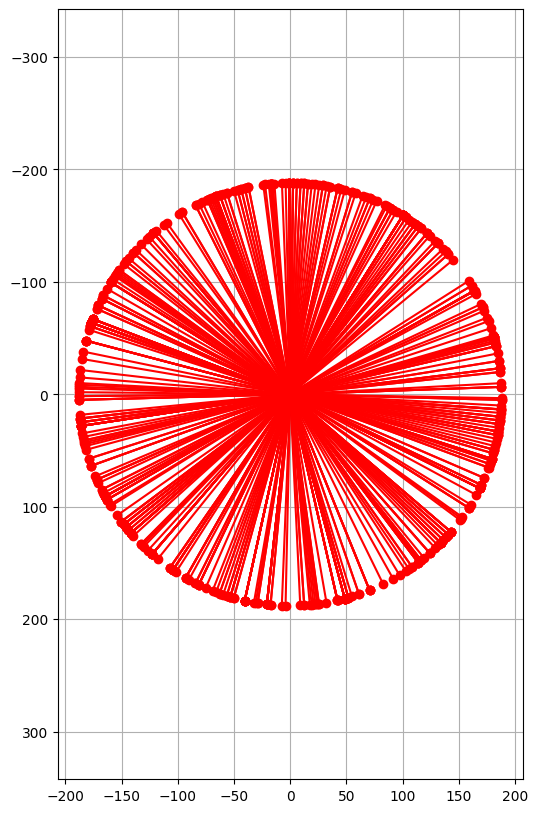

In [7]:
ang, dist = file_read("output0.csv")
ox = np.sin(ang) * dist
oy = np.cos(ang) * dist
plt.figure(figsize=(6,10))
plt.plot([oy, np.zeros(np.size(oy))], [ox, np.zeros(np.size(oy))], "ro-") # lines from 0,0 to the
plt.axis("equal")
bottom, top = plt.ylim()  # return the current ylim
plt.ylim((top, bottom)) # rescale y axis, to match the grid orientation
plt.grid(True)
plt.show()

In [8]:
# import csv
# import os

# def convert_float_to_int_inplace(file_path):
#     # Temporary file to write modified content
#     temp_file = file_path + '.tmp'
    
#     with open(file_path, 'r') as csv_file, open(temp_file, 'w', newline='') as temp_csv_file:
#         reader = csv.reader(csv_file)
#         writer = csv.writer(temp_csv_file)
        
#         for row in reader:
#             modified_row = []
#             for item in row:
#                 try:
#                     # Try converting to float and then to int
#                     modified_row.append(str(int(float(item))))
#                 except ValueError:
#                     # If conversion fails, keep the value as it is
#                     modified_row.append(item)
#             writer.writerow(modified_row)
    
#     # Replace original file with modified content
#     os.remove(file_path)
#     os.rename(temp_file, file_path)

# # Example usage:
# input_file = 'output0.csv'
# convert_float_to_int_inplace(input_file)


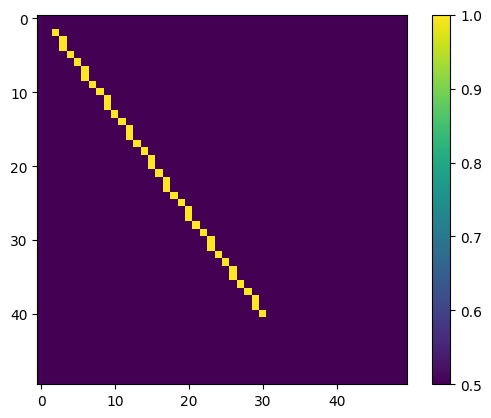

In [9]:
import lidar_to_grid_map as lg
map1 = np.ones((50, 50)) * 0.5
line = lg.bresenham((2, 2), (40, 30))
for l in line:
    map1[l[0]][l[1]] = 1
plt.imshow(map1)
plt.colorbar()
plt.show()

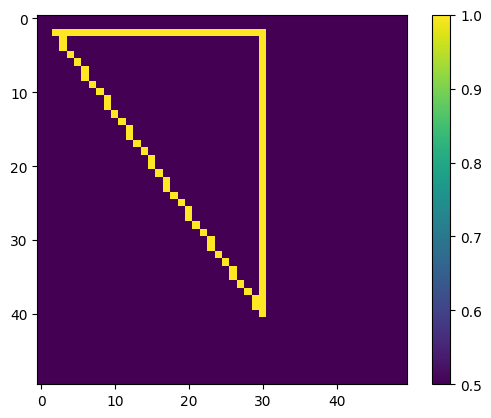

In [10]:
line = lg.bresenham((2, 30), (40, 30))
for l in line:
    map1[l[0]][l[1]] = 1
line = lg.bresenham((2, 30), (2, 2))
for l in line:
    map1[l[0]][l[1]] = 1
plt.imshow(map1)
plt.colorbar()
plt.show()

In [11]:
from collections import deque
def flood_fill(cpoint, pmap):
    """
    cpoint: starting point (x,y) of fill
    pmap: occupancy map generated from Bresenham ray-tracing
    """
    # Fill empty areas with queue method
    sx, sy = pmap.shape
    fringe = deque()
    fringe.appendleft(cpoint)
    while fringe:
        n = fringe.pop()
        nx, ny = n
        # West
        if nx > 0:
            if pmap[nx - 1, ny] == 0.5:
                pmap[nx - 1, ny] = 0.0
                fringe.appendleft((nx - 1, ny))
        # East
        if nx < sx - 1:
            if pmap[nx + 1, ny] == 0.5:
                pmap[nx + 1, ny] = 0.0
                fringe.appendleft((nx + 1, ny))
        # North
        if ny > 0:
            if pmap[nx, ny - 1] == 0.5:
                pmap[nx, ny - 1] = 0.0
                fringe.appendleft((nx, ny - 1))
        # South
        if ny < sy - 1:
            if pmap[nx, ny + 1] == 0.5:
                pmap[nx, ny + 1] = 0.0
                fringe.appendleft((nx, ny + 1))

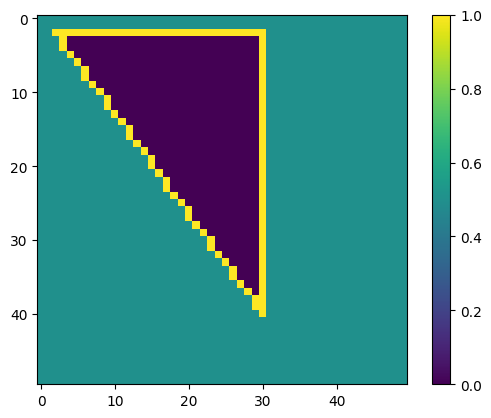

In [12]:
flood_fill((10, 20), map1)
map_float = np.array(map1)/10.0
plt.imshow(map1)
plt.colorbar()
plt.show()

In [13]:
import csv

# Open the CSV file for reading and writing
with open('output0.csv', 'r+', newline='') as file:
    # Create a CSV reader object
    reader = csv.reader(file)
    # Read the CSV data into a list of rows
    rows = list(reader)

    # Iterate through each row in the list
    for row in rows:
        # Convert the value in the second column to float and divide by 1000
        row[1] = str(float(row[1]) / 1000)

    # Move the file pointer to the beginning
    file.seek(0)
    # Create a CSV writer object
    writer = csv.writer(file)
    # Write each modified row to the file
    writer.writerows(rows)

    # If the new data is shorter than the old data, truncate the file to the new size
    file.truncate()


The grid map is  333 x 222 .


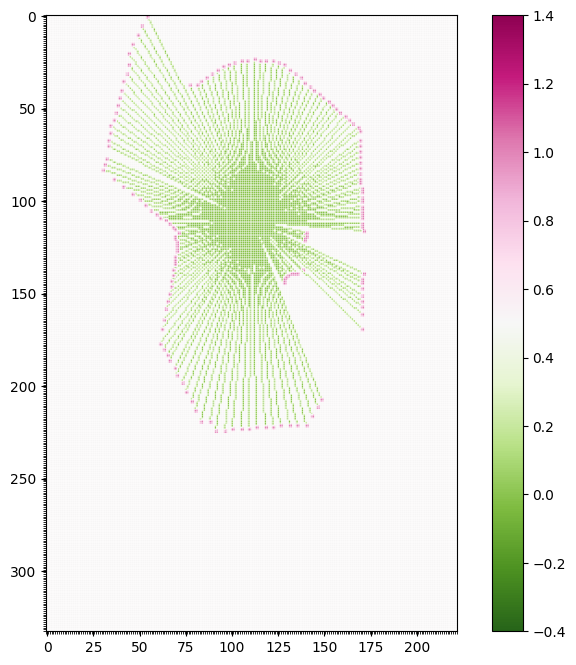

In [15]:

xyreso = 0.009  # x-y grid resolution
yawreso = math.radians(3.1)  # yaw angle resolution [rad]
ang, dist = file_read("C:\\Users\\Sriram\\Downloads\\lidar01.csv")
ox = np.sin(ang) * dist
oy = np.cos(ang) * dist
pmap, minx, maxx, miny, maxy, xyreso = lg.generate_ray_casting_grid_map(ox, oy, xyreso, True)
xyres = np.array(pmap).shape
plt.figure(figsize=(20,8))
plt.subplot(122)
plt.imshow(pmap, cmap = "PiYG_r")
plt.clim(-0.4, 1.4)
plt.gca().set_xticks(np.arange(-.5, xyres[1], 1), minor = True)
plt.gca().set_yticks(np.arange(-.5, xyres[0], 1), minor = True)
plt.grid(True, which="minor", color="w", linewidth = .6, alpha = 0.5)
plt.colorbar()
plt.show()